## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [4]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [8]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
history = model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.9312 - acc: 0.3096 - val_loss: 1.7467 - val_acc: 0.3839
Epoch 2/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.6966 - acc: 0.3944 - val_loss: 1.6609 - val_acc: 0.4039
Epoch 3/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.6064 - acc: 0.4291 - val_loss: 1.5568 - val_acc: 0.4526
Epoch 4/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.5383 - acc: 0.4518 - val_loss: 1.5758 - val_acc: 0.4387
Epoch 5/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.5027 - acc: 0.4651 - val_loss: 1.5113 - val_acc: 0.4626
Epoch 6/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.4697 - acc: 0.4749 - val_loss: 1.4787 - val_acc: 0.4738
Epoch 7/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.4340 - acc: 0.4885 - val_loss: 1.4950 -

Epoch 118/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3434 - acc: 0.8784 - val_loss: 2.7781 - val_acc: 0.4989
Epoch 119/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3391 - acc: 0.8786 - val_loss: 2.7146 - val_acc: 0.5066
Epoch 120/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3329 - acc: 0.8817 - val_loss: 2.7835 - val_acc: 0.4979
Epoch 121/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.3133 - acc: 0.8896 - val_loss: 2.7446 - val_acc: 0.5032
Epoch 122/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3273 - acc: 0.8832 - val_loss: 2.7828 - val_acc: 0.4996
Epoch 123/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3197 - acc: 0.8871 - val_loss: 2.8433 - val_acc: 0.5017
Epoch 124/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3199 - acc: 0.8873 - val_loss: 2.7834 - val_acc: 0.5030
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 78us/step - loss: 0.1671 - acc: 0.9398 - val_loss: 4.1790 - val_acc: 0.4912
Epoch 235/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.1646 - acc: 0.9418 - val_loss: 4.1246 - val_acc: 0.4999
Epoch 236/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1347 - acc: 0.9524 - val_loss: 4.1597 - val_acc: 0.4969
Epoch 237/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.1433 - acc: 0.9486 - val_loss: 4.2503 - val_acc: 0.4992
Epoch 238/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.1655 - acc: 0.9401 - val_loss: 4.2412 - val_acc: 0.4945
Epoch 239/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1904 - acc: 0.9325 - val_loss: 4.1713 - val_acc: 0.4988
Epoch 240/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1453 - acc: 0.9483 - val_loss: 4.1970 - val_acc: 0.4952
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.1089 - acc: 0.9614 - val_loss: 4.8512 - val_acc: 0.4969
Epoch 351/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0781 - acc: 0.9731 - val_loss: 4.8878 - val_acc: 0.4856
Epoch 352/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1477 - acc: 0.9489 - val_loss: 4.8886 - val_acc: 0.4856
Epoch 353/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1195 - acc: 0.9578 - val_loss: 4.8017 - val_acc: 0.4950
Epoch 354/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0934 - acc: 0.9668 - val_loss: 4.8520 - val_acc: 0.4862
Epoch 355/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.1198 - acc: 0.9589 - val_loss: 4.8114 - val_acc: 0.4949
Epoch 356/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1565 - acc: 0.9469 - val_loss: 4.8271 - val_acc: 0.4955
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.4573 - acc: 0.8859 - val_loss: 5.2059 - val_acc: 0.4844
Epoch 467/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0888 - acc: 0.9707 - val_loss: 5.0827 - val_acc: 0.4978
Epoch 468/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0242 - acc: 0.9929 - val_loss: 5.1187 - val_acc: 0.4965
Epoch 469/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0130 - acc: 0.9973 - val_loss: 5.1018 - val_acc: 0.4936
Epoch 470/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0103 - acc: 0.9981 - val_loss: 5.1497 - val_acc: 0.4933
Epoch 471/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0093 - acc: 0.9983 - val_loss: 5.1298 - val_acc: 0.4972
Epoch 472/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0142 - acc: 0.9965 - val_loss: 5.1783 - val_acc: 0.4889
Epoch 473/500
50000/50000 [=======

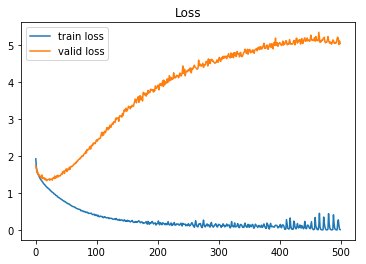

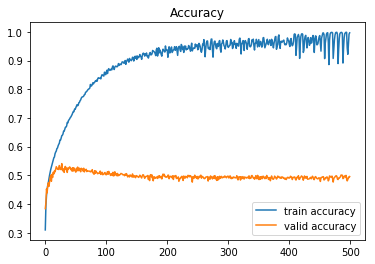

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## SGD

In [5]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='SGD')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
history = model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 137us/step - loss: 2.0461 - acc: 0.2783 - val_loss: 1.9535 - val_acc: 0.2966
Epoch 2/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.8737 - acc: 0.3462 - val_loss: 1.8641 - val_acc: 0.3437
Epoch 3/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.8099 - acc: 0.3692 - val_loss: 1.8158 - val_acc: 0.3630
Epoch 4/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.7681 - acc: 0.3836 - val_loss: 1.7659 - val_acc: 0.3814
Epoch 5/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.7327 - acc: 0.3965 - val_loss: 1.7251 - val_acc: 0.3995
Epoch 6/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.7050 - acc: 0.4065 - val_loss: 1.7160 - val_acc: 0.3922
Epoch 7/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.6801 - acc: 0.4150 - val_loss: 1.7536 -

50000/50000 [==============================] - 4s 71us/step - loss: 1.2354 - acc: 0.5690 - val_loss: 1.4642 - val_acc: 0.4736
Epoch 60/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2351 - acc: 0.5709 - val_loss: 1.4160 - val_acc: 0.4955
Epoch 61/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.2243 - acc: 0.5731 - val_loss: 1.4624 - val_acc: 0.4790
Epoch 62/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.2258 - acc: 0.5737 - val_loss: 1.4243 - val_acc: 0.5083
Epoch 63/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.2223 - acc: 0.5737 - val_loss: 1.3781 - val_acc: 0.5132
Epoch 64/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.2209 - acc: 0.5752 - val_loss: 1.3695 - val_acc: 0.5113
Epoch 65/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2083 - acc: 0.5787 - val_loss: 1.4013 - val_acc: 0.5038
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.9964 - acc: 0.6569 - val_loss: 1.3953 - val_acc: 0.5228
Epoch 119/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.9833 - acc: 0.6583 - val_loss: 1.5509 - val_acc: 0.4690
Epoch 120/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.9849 - acc: 0.6594 - val_loss: 1.4751 - val_acc: 0.4950
Epoch 121/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.9833 - acc: 0.6604 - val_loss: 1.6398 - val_acc: 0.4538
Epoch 122/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.9821 - acc: 0.6614 - val_loss: 1.3664 - val_acc: 0.5300
Epoch 123/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.9725 - acc: 0.6659 - val_loss: 1.3864 - val_acc: 0.5246
Epoch 124/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.9679 - acc: 0.6643 - val_loss: 1.3964 - val_acc: 0.5165
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 64us/step - loss: 0.7956 - acc: 0.7297 - val_loss: 1.4206 - val_acc: 0.5287
Epoch 177/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.7957 - acc: 0.7283 - val_loss: 1.4440 - val_acc: 0.5182
Epoch 178/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.7944 - acc: 0.7279 - val_loss: 1.5476 - val_acc: 0.5052
Epoch 179/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.7916 - acc: 0.7306 - val_loss: 1.4864 - val_acc: 0.5113
Epoch 180/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.7814 - acc: 0.7353 - val_loss: 1.6367 - val_acc: 0.4837
Epoch 181/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.7839 - acc: 0.7313 - val_loss: 1.6650 - val_acc: 0.4802
Epoch 182/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.7843 - acc: 0.7340 - val_loss: 1.4381 - val_acc: 0.5135
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 63us/step - loss: 0.6355 - acc: 0.7885 - val_loss: 1.5649 - val_acc: 0.5242
Epoch 235/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.6110 - acc: 0.7966 - val_loss: 1.5656 - val_acc: 0.5331
Epoch 236/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.6238 - acc: 0.7896 - val_loss: 1.4914 - val_acc: 0.5402
Epoch 237/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.6112 - acc: 0.7964 - val_loss: 1.4639 - val_acc: 0.5439
Epoch 238/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.6126 - acc: 0.7944 - val_loss: 1.9675 - val_acc: 0.4624
Epoch 239/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.6125 - acc: 0.7972 - val_loss: 1.5614 - val_acc: 0.5252
Epoch 240/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.6106 - acc: 0.7966 - val_loss: 1.6195 - val_acc: 0.5089
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 63us/step - loss: 0.4834 - acc: 0.8413 - val_loss: 2.1021 - val_acc: 0.4854
Epoch 293/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4709 - acc: 0.8494 - val_loss: 1.7281 - val_acc: 0.5228
Epoch 294/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.4640 - acc: 0.8506 - val_loss: 1.7277 - val_acc: 0.5209
Epoch 295/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4632 - acc: 0.8508 - val_loss: 1.8019 - val_acc: 0.5127
Epoch 296/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4622 - acc: 0.8519 - val_loss: 1.6855 - val_acc: 0.5325
Epoch 297/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4652 - acc: 0.8514 - val_loss: 1.7133 - val_acc: 0.5224
Epoch 298/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4447 - acc: 0.8588 - val_loss: 1.6396 - val_acc: 0.5372
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.3258 - acc: 0.9006 - val_loss: 1.8899 - val_acc: 0.5253
Epoch 351/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3381 - acc: 0.9004 - val_loss: 1.9128 - val_acc: 0.5210
Epoch 352/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3242 - acc: 0.9024 - val_loss: 1.7719 - val_acc: 0.5407
Epoch 353/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.3158 - acc: 0.9065 - val_loss: 1.8115 - val_acc: 0.5336
Epoch 354/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3442 - acc: 0.8979 - val_loss: 1.7987 - val_acc: 0.5391
Epoch 355/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3364 - acc: 0.8995 - val_loss: 1.7146 - val_acc: 0.5479
Epoch 356/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.3336 - acc: 0.8975 - val_loss: 2.6377 - val_acc: 0.4602
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.2298 - acc: 0.9385 - val_loss: 1.8801 - val_acc: 0.5463
Epoch 409/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2102 - acc: 0.9467 - val_loss: 1.9250 - val_acc: 0.5459
Epoch 410/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2270 - acc: 0.9427 - val_loss: 1.9809 - val_acc: 0.5429
Epoch 411/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2880 - acc: 0.9256 - val_loss: 2.0242 - val_acc: 0.5261
Epoch 412/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2004 - acc: 0.9497 - val_loss: 1.9331 - val_acc: 0.5430
Epoch 413/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1962 - acc: 0.9502 - val_loss: 2.0858 - val_acc: 0.5293
Epoch 414/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2134 - acc: 0.9445 - val_loss: 2.0835 - val_acc: 0.5186
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.1225 - acc: 0.9746 - val_loss: 2.3921 - val_acc: 0.5144
Epoch 467/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2052 - acc: 0.9491 - val_loss: 2.1771 - val_acc: 0.5260
Epoch 468/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1103 - acc: 0.9800 - val_loss: 2.1418 - val_acc: 0.5360
Epoch 469/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1377 - acc: 0.9703 - val_loss: 2.0979 - val_acc: 0.5438
Epoch 470/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1805 - acc: 0.9601 - val_loss: 2.2557 - val_acc: 0.5284
Epoch 471/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1420 - acc: 0.9694 - val_loss: 2.1270 - val_acc: 0.5400
Epoch 472/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0971 - acc: 0.9843 - val_loss: 2.2872 - val_acc: 0.5168
Epoch 473/500
50000/50000 [=======

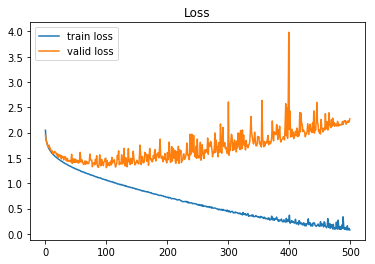

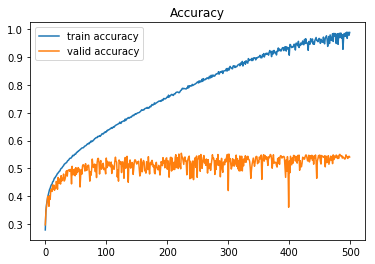

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()